In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import math
from scipy.stats import skew

In [6]:
df2= pd.read_csv('insurance_part2_data.csv')
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [8]:
df2.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [9]:
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [10]:
df2.duplicated().sum()

139

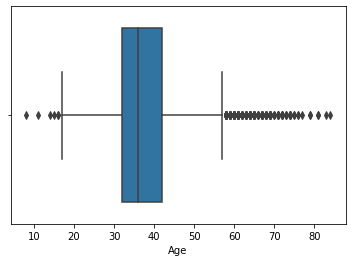

In [11]:
sns.boxplot(x = 'Age', data = df2)

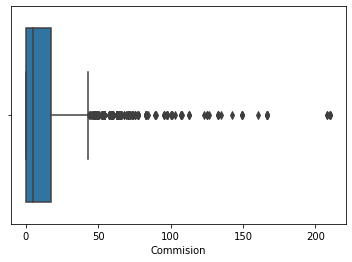

In [12]:
sns.boxplot(x = 'Commision', data = df2)

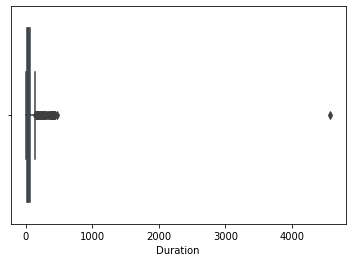

In [13]:
sns.boxplot(x = 'Duration', data = df2)

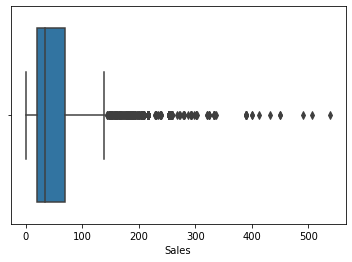

In [14]:
sns.boxplot(x = 'Sales', data = df2)

In [15]:
df2.Duration.unique()

array([   7,   34,    3,    4,   53,    8,   30,   16,   19,   42,  368,
         77,   23,   21,  366,    2,   40,   33,   66,   71,   25,   29,
         31,   36,   70,   11,   27,   32,   20,   90,   17,   14,    5,
         75,   35,   24,   22,  364,   13,   15,    6,   37,  365,   38,
         81,   96,   28,   44,   57,   51,   26,  367,   12,    9,  110,
         58,   65,  100,  186,   39,   48,   46,  266,   72,   61,   43,
         18,  146,   10,   59,   93,   56,   50,   99,  135,  382,   47,
         74,   64,  379,  152,  112,  380,  189,   60,   41,   89,   95,
        383,   62,  374,   55,  401,  145,   80,   83,    1,   52,  114,
         63,   49,   69,   67,  109,  105,   54,   98,  259,  239,  102,
        166,  165,  107,  385,   68,   73,  144,  126,  116,   45,  113,
        111,  378,   82,  187,  394,  147,   88,  175,   87,  402,  393,
        224,  384,  244,  148,  209,  132,  377,  235,   79,  101,  158,
        120,  376,  125,  386,  162,  375,   76,  1

In [16]:
df2.Duration.describe()

count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64

In [17]:
df2.Duration.mode()

0    8
dtype: int64

In [18]:
df2['Duration'] = df2['Duration'].replace(-1, 0)

df2['Duration'].describe()

count    3000.000000
mean       70.001667
std       134.053138
min         0.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64

In [19]:
df2.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [20]:
numcol = ['Age','Commision','Duration', 'Sales']
numcol

['Age', 'Commision', 'Duration', 'Sales']

In [21]:
catcol =['Agency_Code', 'Type', 'Claimed','Channel','Product Name', 'Destination']
catcol

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

In [22]:
def univaranalysis(column,nbins):
    print("Description of " + column)
    print("---------------")
    print(df2[column].describe(),end=' ')
    print('')
    print('')
       
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------")
    sns.histplot(df2[column], kde=True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df2[column])
    plt.show()

Description of Age
---------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 

Distribution of Age
----------------------------------


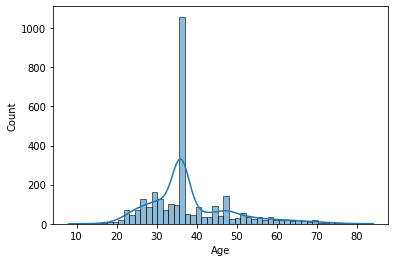

BoxPlot of Age
----------------------------------------------------------------------------


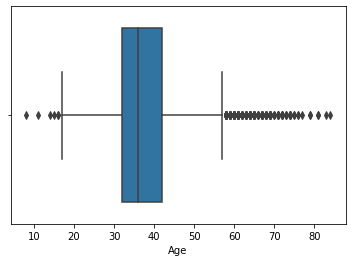

Description of Commision
---------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 

Distribution of Commision
----------------------------------


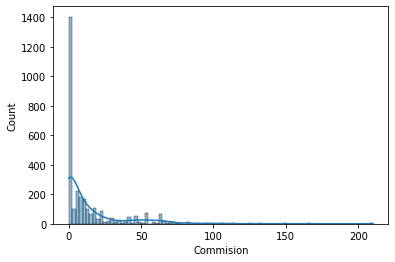

BoxPlot of Commision
----------------------------------------------------------------------------


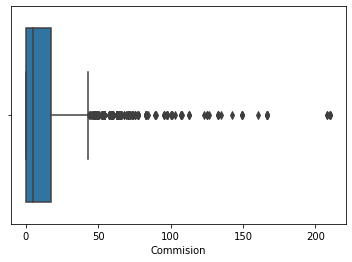

Description of Duration
---------------
count    3000.000000
mean       70.001667
std       134.053138
min         0.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 

Distribution of Duration
----------------------------------


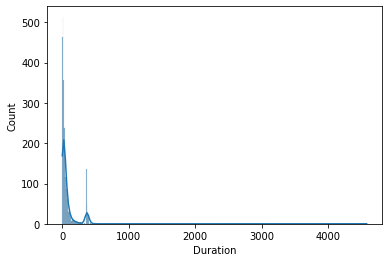

BoxPlot of Duration
----------------------------------------------------------------------------


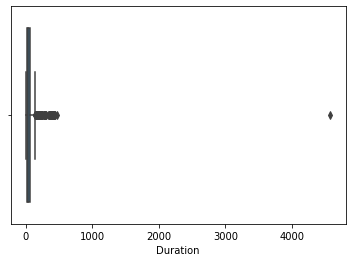

Description of Sales
---------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 

Distribution of Sales
----------------------------------


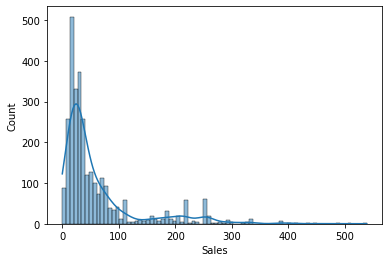

BoxPlot of Sales
----------------------------------------------------------------------------


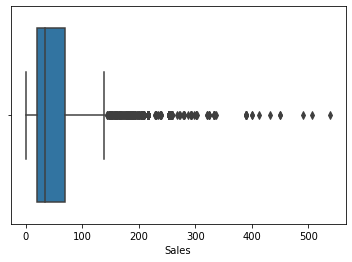

In [23]:
for x in numcol:
    univaranalysis(x,20)

In [24]:
df2.skew(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age           1.149713
Commision     3.148858
Duration     13.784730
Sales         2.381148
dtype: float64

In [25]:
def univarcatcol(column,nbins):
    print("Percentage Value counts of " + column)
    print("------------------------")
    print(df2[column].value_counts(normalize = True),end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Frequency Distribution of " + column)
    print("------------------------")
    ax = sns.countplot(y=df2[column])
    plt.show()

Percentage Value counts of Agency_Code
------------------------
EPX    0.455000
C2B    0.308000
CWT    0.157333
JZI    0.079667
Name: Agency_Code, dtype: float64 

Frequency Distribution of Agency_Code
------------------------


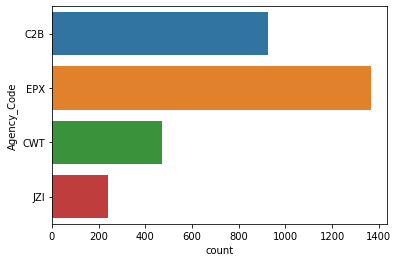

Percentage Value counts of Type
------------------------
Travel Agency    0.612333
Airlines         0.387667
Name: Type, dtype: float64 

Frequency Distribution of Type
------------------------


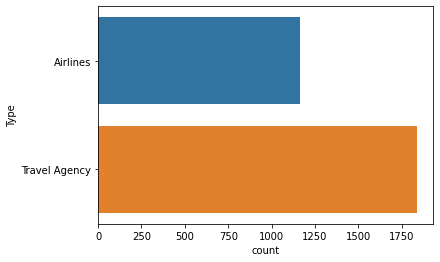

Percentage Value counts of Claimed
------------------------
No     0.692
Yes    0.308
Name: Claimed, dtype: float64 

Frequency Distribution of Claimed
------------------------


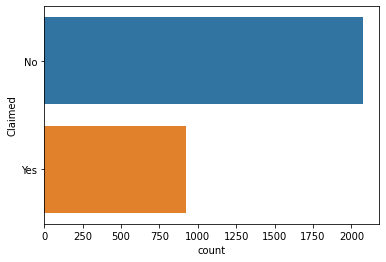

Percentage Value counts of Channel
------------------------
Online     0.984667
Offline    0.015333
Name: Channel, dtype: float64 

Frequency Distribution of Channel
------------------------


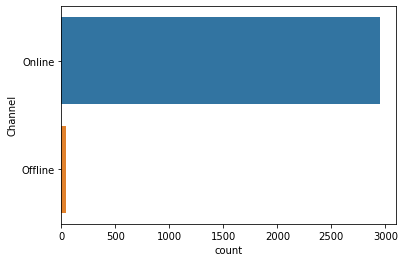

Percentage Value counts of Product Name
------------------------
Customised Plan      0.378667
Cancellation Plan    0.226000
Bronze Plan          0.216667
Silver Plan          0.142333
Gold Plan            0.036333
Name: Product Name, dtype: float64 

Frequency Distribution of Product Name
------------------------


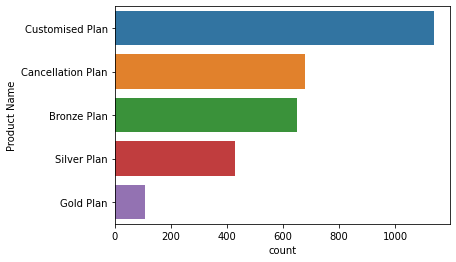

Percentage Value counts of Destination
------------------------
ASIA        0.821667
Americas    0.106667
EUROPE      0.071667
Name: Destination, dtype: float64 

Frequency Distribution of Destination
------------------------


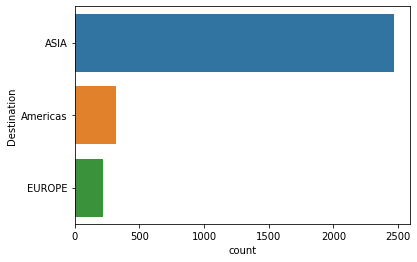

In [26]:
for x in catcol:
    univarcatcol(x,20)

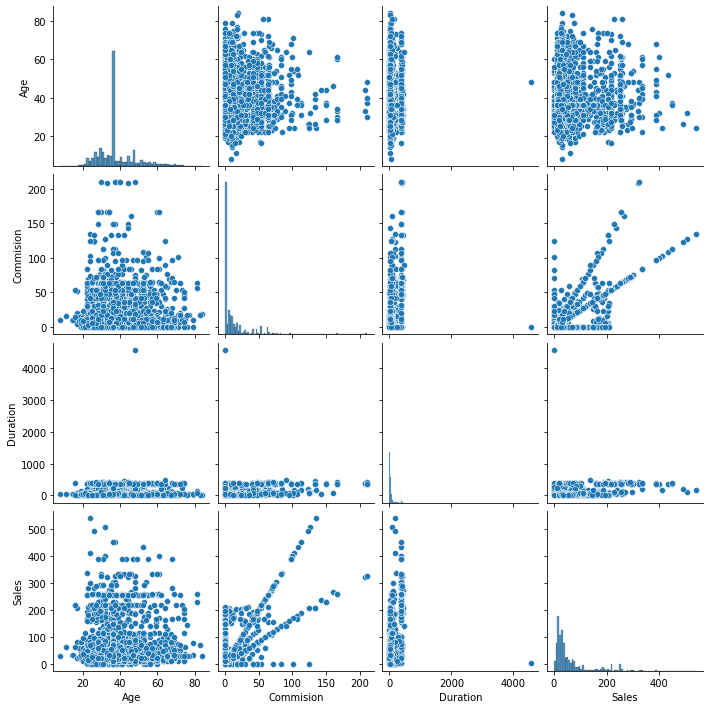

In [27]:
sns.pairplot(df2)

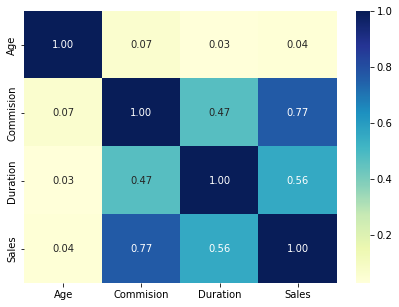

In [28]:
plt.figure(figsize=(7,5))
sns.heatmap(df2.corr(),cmap="YlGnBu", annot=True,fmt=".2f")

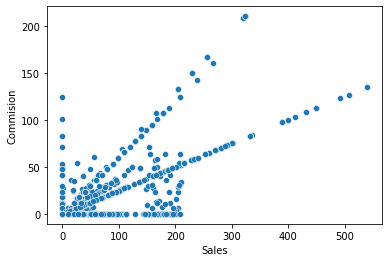

In [29]:
sns.scatterplot(x = 'Sales', y= 'Commision',data=df2)

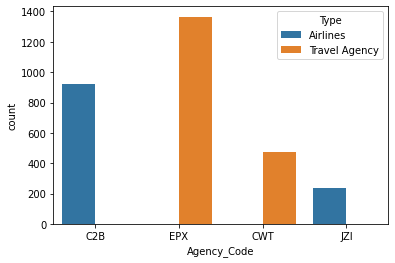

In [30]:
sns.countplot(x='Agency_Code', hue='Type', data=df2)

In [31]:
pd.crosstab(df2['Agency_Code'], df2['Type'], margins=True)

Type,Airlines,Travel Agency,All
Agency_Code,,,
C2B,924,0,924
CWT,0,472,472
EPX,0,1365,1365
JZI,239,0,239
All,1163,1837,3000


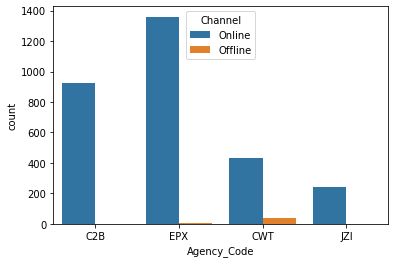

In [32]:
sns.countplot(x='Agency_Code', hue='Channel', data=df2)

In [33]:
pd.crosstab(df2['Agency_Code'], df2['Channel'], margins=True)

Channel,Offline,Online,All
Agency_Code,,,
C2B,0,924,924
CWT,40,432,472
EPX,6,1359,1365
JZI,0,239,239
All,46,2954,3000


In [34]:
pd.crosstab(df2['Agency_Code'], df2['Channel'], margins=True, normalize = True)

Channel,Offline,Online,All
Agency_Code,,,
C2B,0.000000,0.308000,0.308000
CWT,0.013333,0.144000,0.157333
EPX,0.002000,0.453000,0.455000
JZI,0.000000,0.079667,0.079667
All,0.015333,0.984667,1.000000


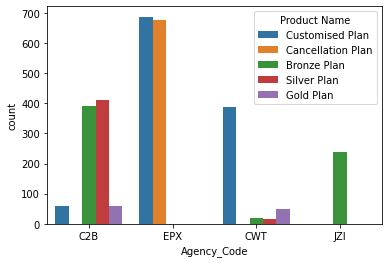

In [35]:
sns.countplot(x='Agency_Code', hue='Product Name', data=df2)

In [36]:
pd.crosstab(df2['Agency_Code'], df2['Product Name'], margins=True)

Product Name,Bronze Plan,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,All
Agency_Code,,,,,,
C2B,392,0,60,60,412,924
CWT,19,0,389,49,15,472
EPX,0,678,687,0,0,1365
JZI,239,0,0,0,0,239
All,650,678,1136,109,427,3000


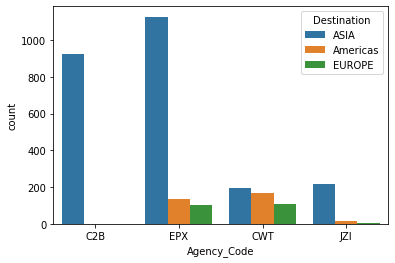

In [37]:
sns.countplot(x='Agency_Code', hue='Destination', data=df2)

In [38]:
pd.crosstab(df2['Agency_Code'], df2['Destination'], margins=True)

Destination,ASIA,Americas,EUROPE,All
Agency_Code,,,,
C2B,924,0,0,924
CWT,194,170,108,472
EPX,1128,134,103,1365
JZI,219,16,4,239
All,2465,320,215,3000


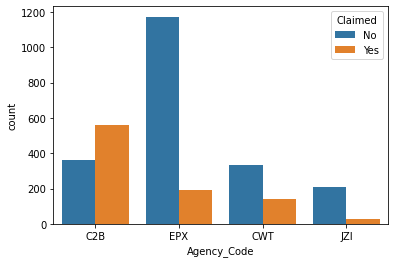

In [39]:
sns.countplot(x='Agency_Code', hue='Claimed', data=df2)

In [40]:
pd.crosstab(df2['Agency_Code'], df2['Claimed'], margins=True)

Claimed,No,Yes,All
Agency_Code,,,
C2B,364,560,924
CWT,331,141,472
EPX,1172,193,1365
JZI,209,30,239
All,2076,924,3000


In [41]:
pd.crosstab(df2['Agency_Code'], df2['Claimed'], margins=True, normalize = True)

Claimed,No,Yes,All
Agency_Code,,,
C2B,0.121333,0.186667,0.308000
CWT,0.110333,0.047000,0.157333
EPX,0.390667,0.064333,0.455000
JZI,0.069667,0.010000,0.079667
All,0.692000,0.308000,1.000000


In [42]:
catcol

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

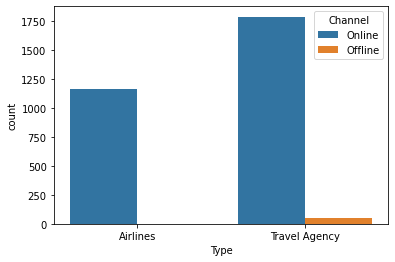

In [43]:
sns.countplot(x='Type', hue='Channel', data=df2)

In [44]:
pd.crosstab(df2['Type'], df2['Channel'], margins=True)

Channel,Offline,Online,All
Type,,,
Airlines,0,1163,1163
Travel Agency,46,1791,1837
All,46,2954,3000


In [45]:
pd.crosstab(df2['Type'], df2['Channel'], margins=True, normalize = True)

Channel,Offline,Online,All
Type,,,
Airlines,0.000000,0.387667,0.387667
Travel Agency,0.015333,0.597000,0.612333
All,0.015333,0.984667,1.000000


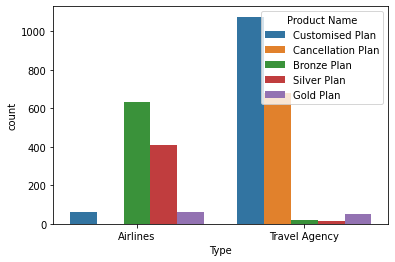

In [46]:
sns.countplot(x='Type', hue='Product Name', data=df2)

In [47]:
pd.crosstab(df2['Type'], df2['Product Name'], margins=True)

Product Name,Bronze Plan,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,All
Type,,,,,,
Airlines,631,0,60,60,412,1163
Travel Agency,19,678,1076,49,15,1837
All,650,678,1136,109,427,3000


In [48]:
pd.crosstab(df2['Type'], df2['Product Name'], margins=True, normalize = True)

Product Name,Bronze Plan,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,All
Type,,,,,,
Airlines,0.210333,0.000,0.020000,0.020000,0.137333,0.387667
Travel Agency,0.006333,0.226,0.358667,0.016333,0.005000,0.612333
All,0.216667,0.226,0.378667,0.036333,0.142333,1.000000


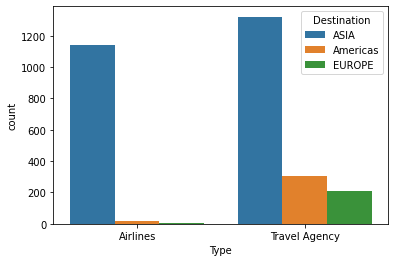

In [49]:
sns.countplot(x='Type', hue='Destination', data=df2)

In [50]:
pd.crosstab(df2['Type'], df2['Destination'], margins=True)

Destination,ASIA,Americas,EUROPE,All
Type,,,,
Airlines,1143,16,4,1163
Travel Agency,1322,304,211,1837
All,2465,320,215,3000


In [51]:
pd.crosstab(df2['Type'], df2['Destination'], margins=True, normalize = True)

Destination,ASIA,Americas,EUROPE,All
Type,,,,
Airlines,0.381000,0.005333,0.001333,0.387667
Travel Agency,0.440667,0.101333,0.070333,0.612333
All,0.821667,0.106667,0.071667,1.000000


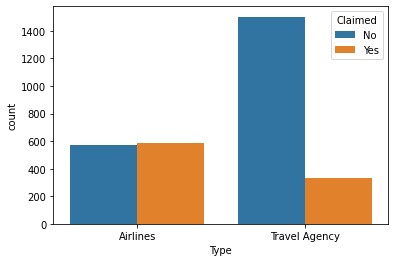

In [52]:
sns.countplot(x='Type', hue='Claimed', data=df2)

In [53]:
pd.crosstab(df2['Type'], df2['Claimed'], margins=True)

Claimed,No,Yes,All
Type,,,
Airlines,573,590,1163
Travel Agency,1503,334,1837
All,2076,924,3000


In [54]:
pd.crosstab(df2['Type'], df2['Claimed'], margins=True, normalize = True)

Claimed,No,Yes,All
Type,,,
Airlines,0.191,0.196667,0.387667
Travel Agency,0.501,0.111333,0.612333
All,0.692,0.308000,1.000000


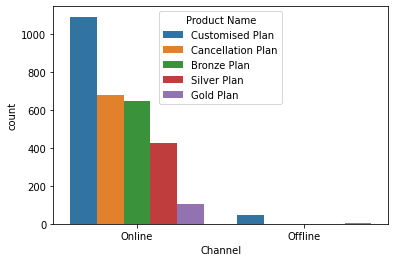

In [55]:
sns.countplot(x='Channel', hue='Product Name', data=df2)

In [56]:
pd.crosstab(df2['Channel'], df2['Product Name'], margins=True)

Product Name,Bronze Plan,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,All
Channel,,,,,,
Offline,0,0,44,2,0,46
Online,650,678,1092,107,427,2954
All,650,678,1136,109,427,3000


In [57]:
pd.crosstab(df2['Channel'], df2['Product Name'], margins=True, normalize = True)

Product Name,Bronze Plan,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,All
Channel,,,,,,
Offline,0.000000,0.000,0.014667,0.000667,0.000000,0.015333
Online,0.216667,0.226,0.364000,0.035667,0.142333,0.984667
All,0.216667,0.226,0.378667,0.036333,0.142333,1.000000


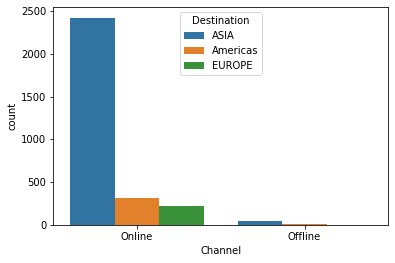

In [58]:
sns.countplot(x='Channel', hue='Destination', data=df2)

In [59]:
pd.crosstab(df2['Channel'], df2['Destination'], margins=True)

Destination,ASIA,Americas,EUROPE,All
Channel,,,,
Offline,42,4,0,46
Online,2423,316,215,2954
All,2465,320,215,3000


In [60]:
pd.crosstab(df2['Channel'], df2['Destination'], margins=True, normalize = True)

Destination,ASIA,Americas,EUROPE,All
Channel,,,,
Offline,0.014000,0.001333,0.000000,0.015333
Online,0.807667,0.105333,0.071667,0.984667
All,0.821667,0.106667,0.071667,1.000000


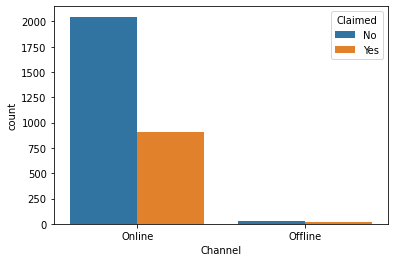

In [61]:
sns.countplot(x='Channel', hue='Claimed', data=df2)

In [62]:
pd.crosstab(df2['Channel'], df2['Claimed'], margins=True)

Claimed,No,Yes,All
Channel,,,
Offline,29,17,46
Online,2047,907,2954
All,2076,924,3000


In [63]:
pd.crosstab(df2['Channel'], df2['Claimed'], margins=True, normalize = True)

Claimed,No,Yes,All
Channel,,,
Offline,0.009667,0.005667,0.015333
Online,0.682333,0.302333,0.984667
All,0.692000,0.308000,1.000000


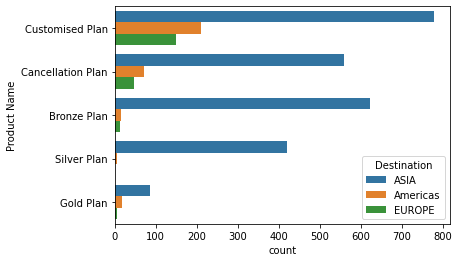

In [64]:
sns.countplot(y='Product Name', hue='Destination', data=df2)

In [65]:
pd.crosstab(df2['Product Name'], df2['Destination'], margins=True)

Destination,ASIA,Americas,EUROPE,All
Product Name,,,,
Bronze Plan,622,16,12,650
Cancellation Plan,558,72,48,678
Customised Plan,777,210,149,1136
Gold Plan,87,17,5,109
Silver Plan,421,5,1,427
All,2465,320,215,3000


In [66]:
pd.crosstab(df2['Product Name'], df2['Destination'], margins=True, normalize = True)

Destination,ASIA,Americas,EUROPE,All
Product Name,,,,
Bronze Plan,0.207333,0.005333,0.004000,0.216667
Cancellation Plan,0.186000,0.024000,0.016000,0.226000
Customised Plan,0.259000,0.070000,0.049667,0.378667
Gold Plan,0.029000,0.005667,0.001667,0.036333
Silver Plan,0.140333,0.001667,0.000333,0.142333
All,0.821667,0.106667,0.071667,1.000000


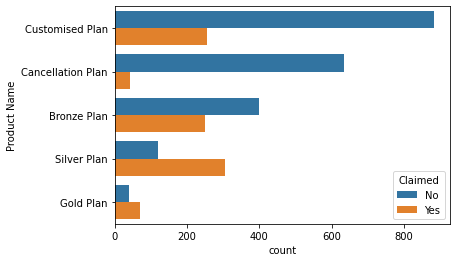

In [67]:
sns.countplot(y='Product Name', hue='Claimed', data=df2)

In [68]:
pd.crosstab(df2['Product Name'], df2['Claimed'], margins=True)

Claimed,No,Yes,All
Product Name,,,
Bronze Plan,399,251,650
Cancellation Plan,635,43,678
Customised Plan,882,254,1136
Gold Plan,39,70,109
Silver Plan,121,306,427
All,2076,924,3000


In [69]:
pd.crosstab(df2['Product Name'], df2['Claimed'], margins=True, normalize = True)

Claimed,No,Yes,All
Product Name,,,
Bronze Plan,0.133000,0.083667,0.216667
Cancellation Plan,0.211667,0.014333,0.226000
Customised Plan,0.294000,0.084667,0.378667
Gold Plan,0.013000,0.023333,0.036333
Silver Plan,0.040333,0.102000,0.142333
All,0.692000,0.308000,1.000000


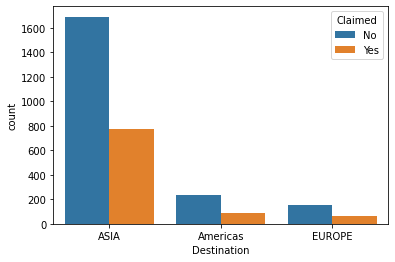

In [70]:
sns.countplot(x='Destination', hue='Claimed', data=df2)

In [71]:
pd.crosstab(df2['Destination'], df2['Claimed'], margins=True)

Claimed,No,Yes,All
Destination,,,
ASIA,1691,774,2465
Americas,232,88,320
EUROPE,153,62,215
All,2076,924,3000


In [72]:
pd.crosstab(df2['Destination'], df2['Claimed'], margins=True, normalize = True)

Claimed,No,Yes,All
Destination,,,
ASIA,0.563667,0.258000,0.821667
Americas,0.077333,0.029333,0.106667
EUROPE,0.051000,0.020667,0.071667
All,0.692000,0.308000,1.000000


In [73]:
catcol

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

In [74]:
def bivarnumcat(column,nbins):
    print("Mean of Age for " + column)
    print(df2.groupby(df2[column])['Age'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of Age vs " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x= df2[column], y='Age', data=df2)
    plt.show()

Mean of Age for Agency_Code
Agency_Code
C2B    37.765152
CWT    40.141949
EPX    36.832967
JZI    42.485356
Name: Age, dtype: float64 

Plot of Age vs Agency_Code
----------------------------------------------------------------------------


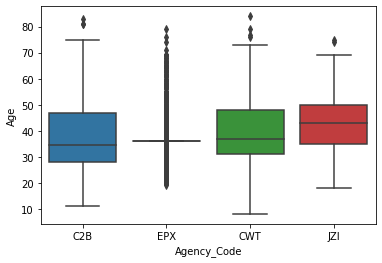

Mean of Age for Type
Type
Airlines         38.735168
Travel Agency    37.683179
Name: Age, dtype: float64 

Plot of Age vs Type
----------------------------------------------------------------------------


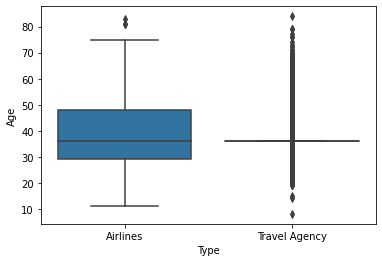

Mean of Age for Claimed
Claimed
No     38.300578
Yes    37.620130
Name: Age, dtype: float64 

Plot of Age vs Claimed
----------------------------------------------------------------------------


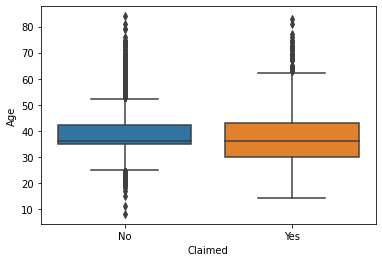

Mean of Age for Channel
Channel
Offline    43.869565
Online     38.001016
Name: Age, dtype: float64 

Plot of Age vs Channel
----------------------------------------------------------------------------


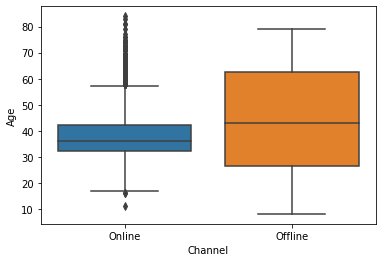

Mean of Age for Product Name
Product Name
Bronze Plan          38.412308
Cancellation Plan    36.497050
Customised Plan      38.608275
Gold Plan            41.908257
Silver Plan          37.782201
Name: Age, dtype: float64 

Plot of Age vs Product Name
----------------------------------------------------------------------------


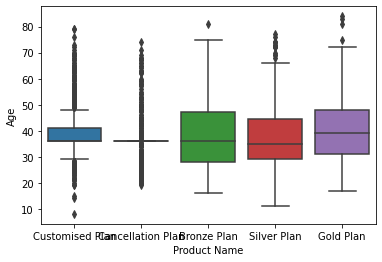

Mean of Age for Destination
Destination
ASIA        38.048276
Americas    38.481250
EUROPE      38.000000
Name: Age, dtype: float64 

Plot of Age vs Destination
----------------------------------------------------------------------------


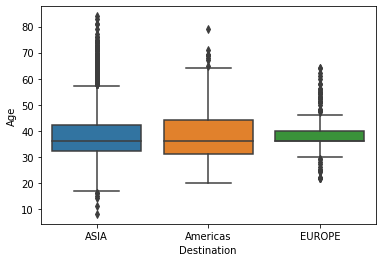

In [75]:
for x in catcol:
    bivarnumcat(x,20)

In [76]:
def bivarnumcat(column,nbins):
    print("Mean of Duration for " + column)
    print(df2.groupby(df2[column])['Duration'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of Duration vs " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x= df2[column], y='Duration', data=df2)
    plt.show()

Mean of Duration for Agency_Code
Agency_Code
C2B    119.404762
CWT     64.733051
EPX     43.374359
JZI     41.485356
Name: Duration, dtype: float64 

Plot of Duration vs Agency_Code
----------------------------------------------------------------------------


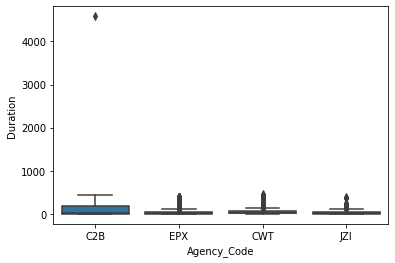

Mean of Duration for Type
Type
Airlines         103.392089
Travel Agency     48.862275
Name: Duration, dtype: float64 

Plot of Duration vs Type
----------------------------------------------------------------------------


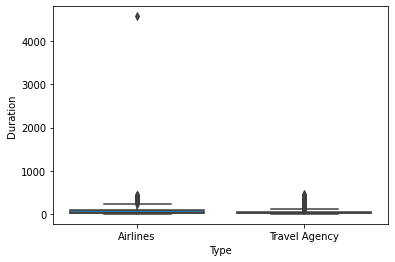

Mean of Duration for Claimed
Claimed
No      50.783719
Yes    113.179654
Name: Duration, dtype: float64 

Plot of Duration vs Claimed
----------------------------------------------------------------------------


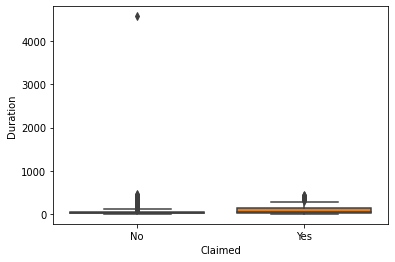

Mean of Duration for Channel
Channel
Offline    90.826087
Online     69.677387
Name: Duration, dtype: float64 

Plot of Duration vs Channel
----------------------------------------------------------------------------


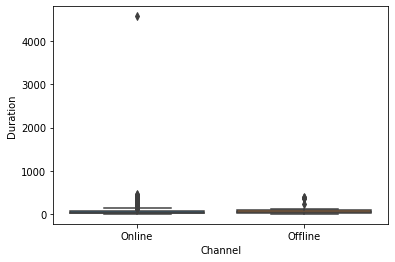

Mean of Duration for Product Name
Product Name
Bronze Plan           35.078462
Cancellation Plan     41.026549
Customised Plan       51.676937
Gold Plan            178.688073
Silver Plan          190.177986
Name: Duration, dtype: float64 

Plot of Duration vs Product Name
----------------------------------------------------------------------------


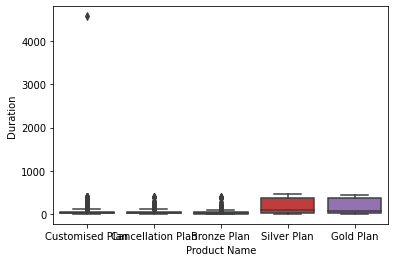

Mean of Duration for Destination
Destination
ASIA        70.443408
Americas    77.409375
EUROPE      53.911628
Name: Duration, dtype: float64 

Plot of Duration vs Destination
----------------------------------------------------------------------------


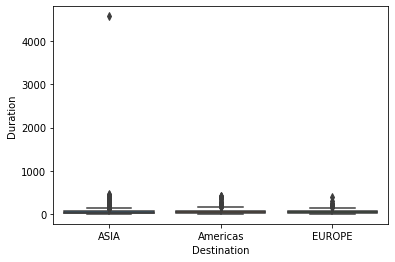

In [77]:
for x in catcol:
    bivarnumcat(x,20)

In [78]:
def bivarnumcat(column,nbins):
    print("Mean of Sales for " + column)
    print(df2.groupby(df2[column])['Sales'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of Sales vs " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x= df2[column], y='Sales', data=df2)
    plt.show()

Mean of Sales for Agency_Code
Agency_Code
C2B    94.984632
CWT    66.834852
EPX    38.671810
JZI    36.196109
Name: Sales, dtype: float64 

Plot of Sales vs Agency_Code
----------------------------------------------------------------------------


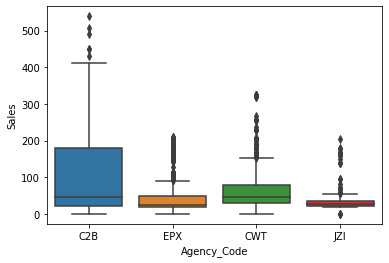

Mean of Sales for Type
Type
Airlines         82.903414
Travel Agency    45.908040
Name: Sales, dtype: float64 

Plot of Sales vs Type
----------------------------------------------------------------------------


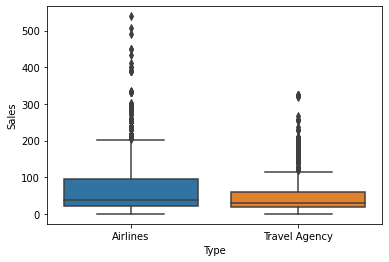

Mean of Sales for Claimed
Claimed
No     43.789133
Yes    97.233225
Name: Sales, dtype: float64 

Plot of Sales vs Claimed
----------------------------------------------------------------------------


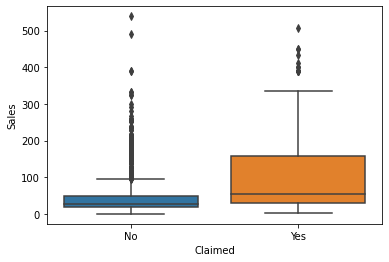

Mean of Sales for Channel
Channel
Offline    39.043478
Online     60.580142
Name: Sales, dtype: float64 

Plot of Sales vs Channel
----------------------------------------------------------------------------


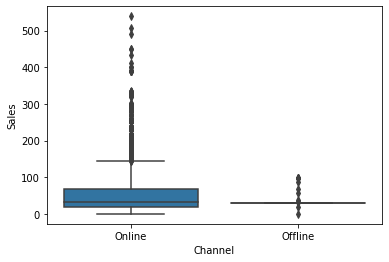

Mean of Sales for Product Name
Product Name
Bronze Plan           39.446754
Cancellation Plan     31.965988
Customised Plan       47.863697
Gold Plan            179.743578
Silver Plan          139.276815
Name: Sales, dtype: float64 

Plot of Sales vs Product Name
----------------------------------------------------------------------------


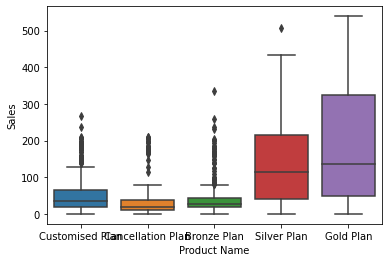

Mean of Sales for Destination
Destination
ASIA        56.467513
Americas    82.573281
EUROPE      70.390093
Name: Sales, dtype: float64 

Plot of Sales vs Destination
----------------------------------------------------------------------------


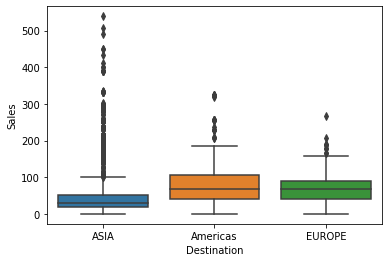

In [79]:
for x in catcol:
    bivarnumcat(x,20)

Mean of Commission for Agency_Code
Agency_Code
C2B    24.006169
CWT    39.144619
EPX     0.108425
JZI    11.638703
Name: Commision, dtype: float64 

Plot of Commission vs Agency_Code
----------------------------------------------------------------------------


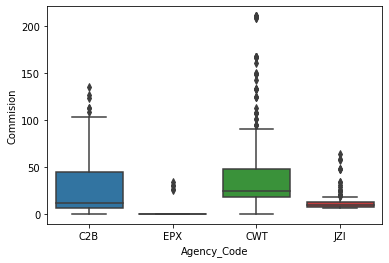

Mean of Commission for Type
Type
Airlines         21.464617
Travel Agency    10.138410
Name: Commision, dtype: float64 

Plot of Commission vs Type
----------------------------------------------------------------------------


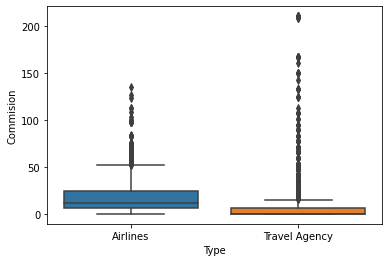

Mean of Commission for Claimed
Claimed
No      9.472606
Yes    25.890130
Name: Commision, dtype: float64 

Plot of Commission vs Claimed
----------------------------------------------------------------------------


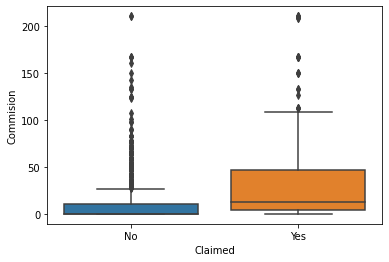

Mean of Commission for Channel
Channel
Offline     7.676957
Online     14.635907
Name: Commision, dtype: float64 

Plot of Commission vs Channel
----------------------------------------------------------------------------


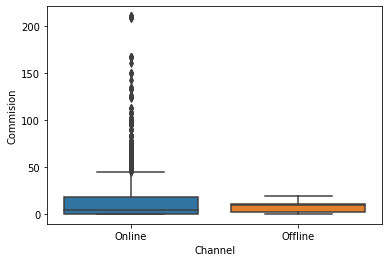

Mean of Commission for Product Name
Product Name
Bronze Plan          11.322938
Cancellation Plan     0.132743
Customised Plan      11.654463
Gold Plan            67.195596
Silver Plan          36.472857
Name: Commision, dtype: float64 

Plot of Commission vs Product Name
----------------------------------------------------------------------------


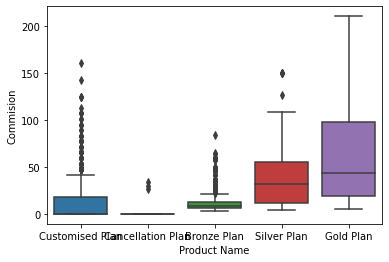

Mean of Commission for Destination
Destination
ASIA        11.732207
Americas    32.339906
EUROPE      20.088140
Name: Commision, dtype: float64 

Plot of Commission vs Destination
----------------------------------------------------------------------------


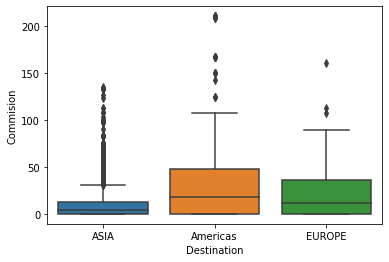

In [80]:
def bivarnumcat(column,nbins):
    print("Mean of Commission for " + column)
    print(df2.groupby(df2[column])['Commision'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of Commission vs " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x= df2[column], y='Commision', data=df2)
    plt.show()
for x in catcol:
    bivarnumcat(x,20)

Plot of Age vs Product
----------------------------------------------------------------------------


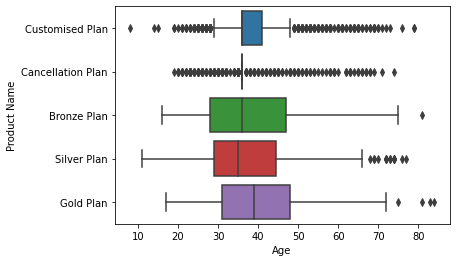

In [81]:
plt.figure()
print("Plot of Age vs Product")
print("----------------------------------------------------------------------------")
sns.boxplot(x= 'Age', y='Product Name', data=df2)
plt.show()

Plot of Duration vs Product
----------------------------------------------------------------------------


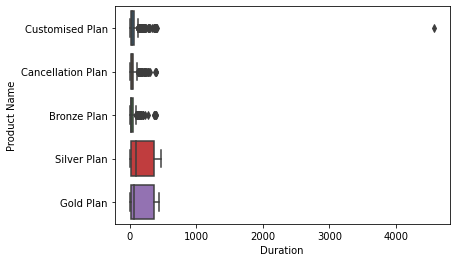

In [82]:
plt.figure()
print("Plot of Duration vs Product")
print("----------------------------------------------------------------------------")
sns.boxplot(x= 'Duration', y='Product Name', data=df2)
plt.show()

Plot of Sales vs Product
----------------------------------------------------------------------------


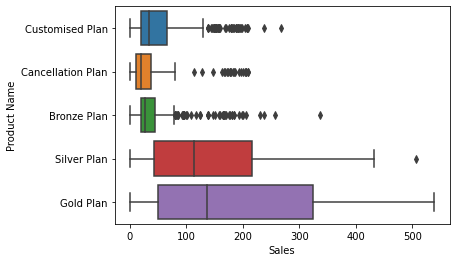

In [83]:
plt.figure()
print("Plot of Sales vs Product")
print("----------------------------------------------------------------------------")
sns.boxplot(x= 'Sales', y='Product Name', data=df2)
plt.show()

Plot of Commission vs Product
----------------------------------------------------------------------------


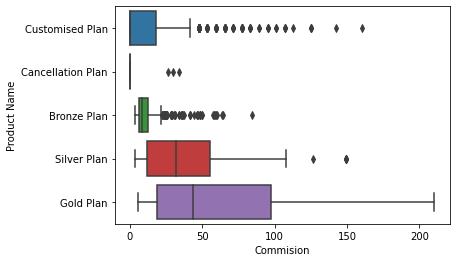

In [84]:
plt.figure()
print("Plot of Commission vs Product")
print("----------------------------------------------------------------------------")
sns.boxplot(x= 'Commision', y='Product Name', data=df2)
plt.show()

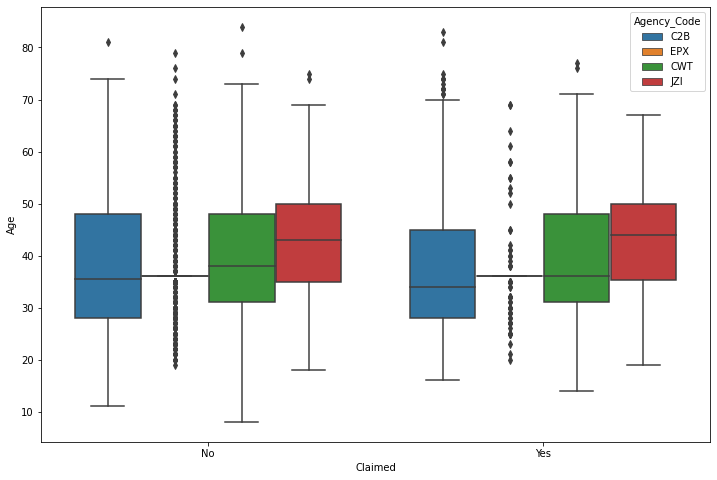

In [85]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Age', hue='Agency_Code',data=df2)

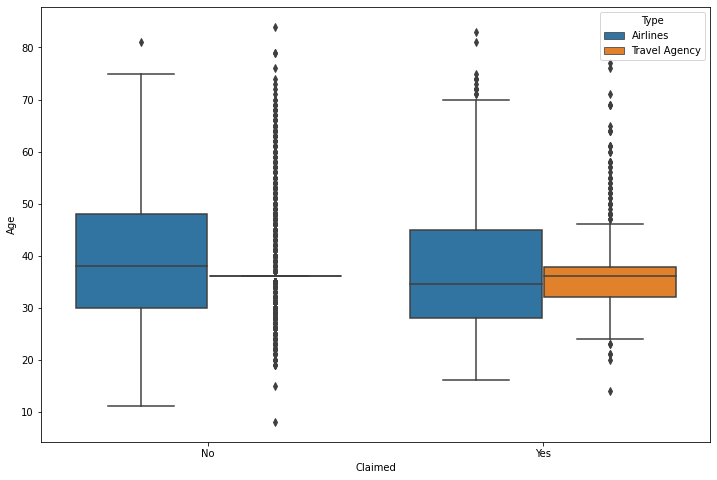

In [86]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Age', hue='Type',data=df2)

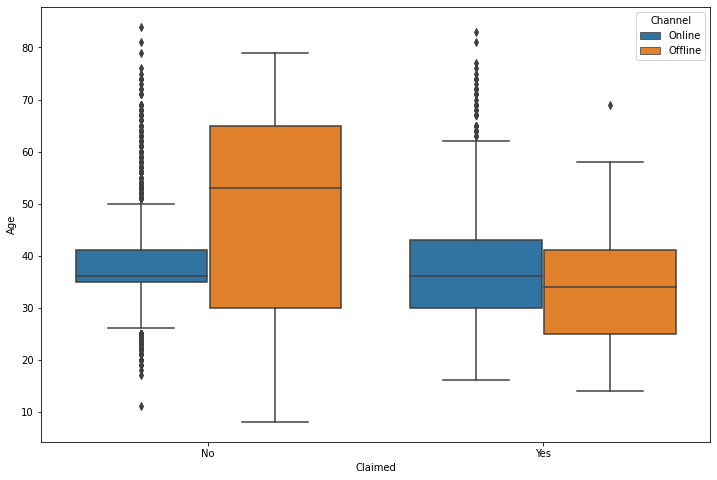

In [87]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Age', hue='Channel',data=df2)

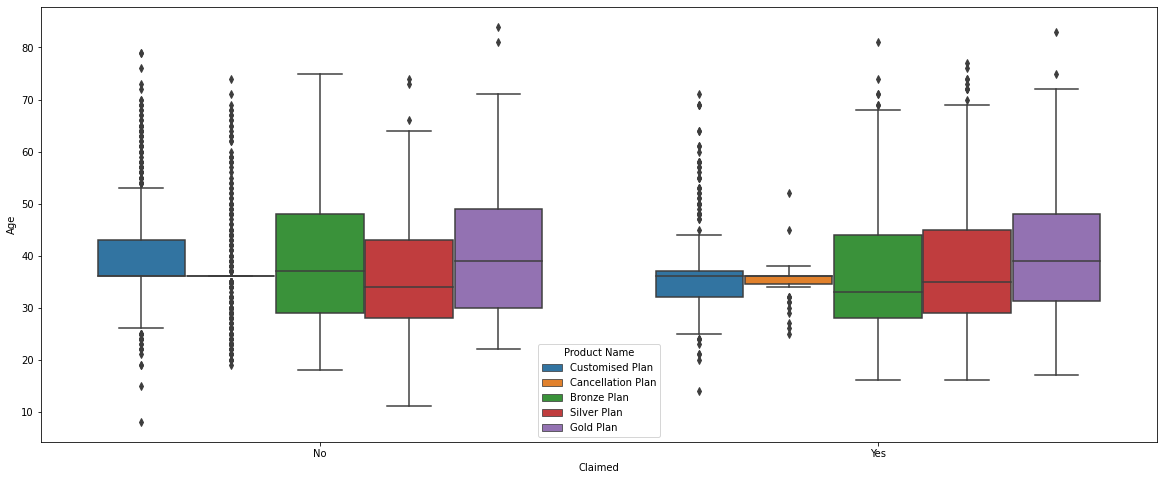

In [88]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(x='Claimed', y='Age', hue='Product Name',data=df2)

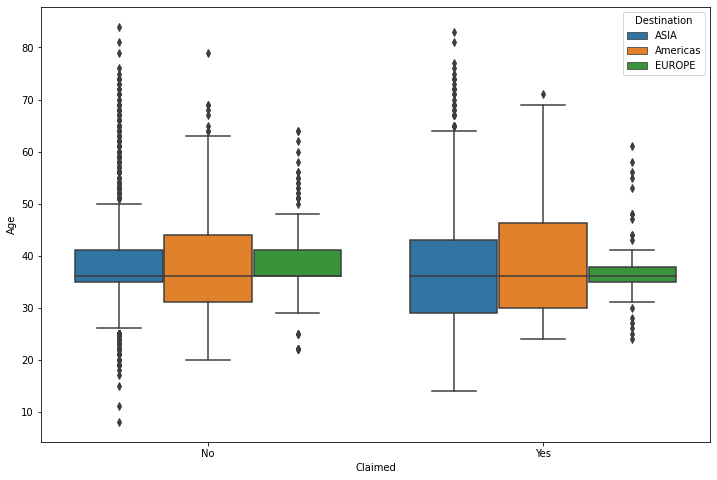

In [89]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Age', hue='Destination',data=df2)

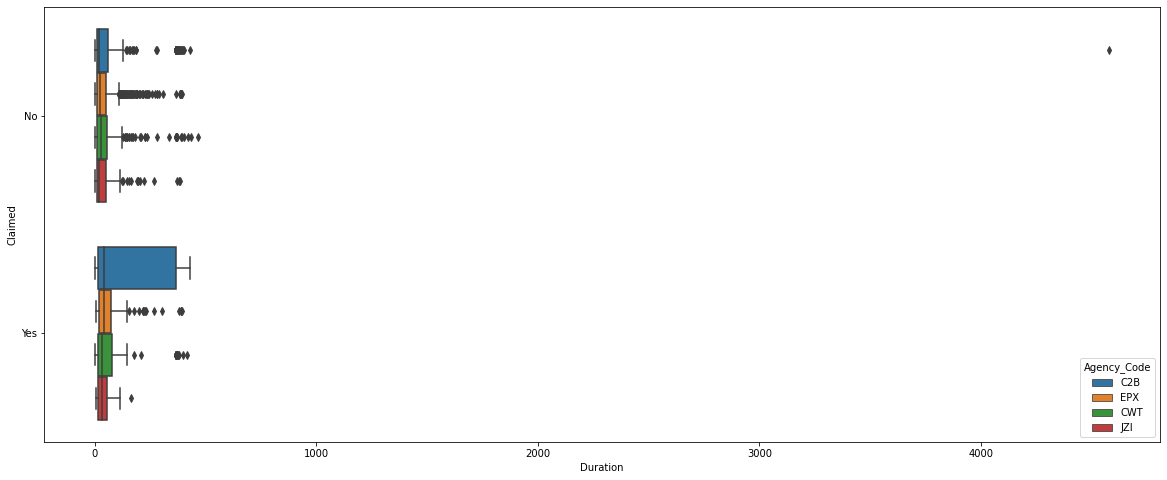

In [90]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(y='Claimed', x='Duration', hue='Agency_Code',data=df2)

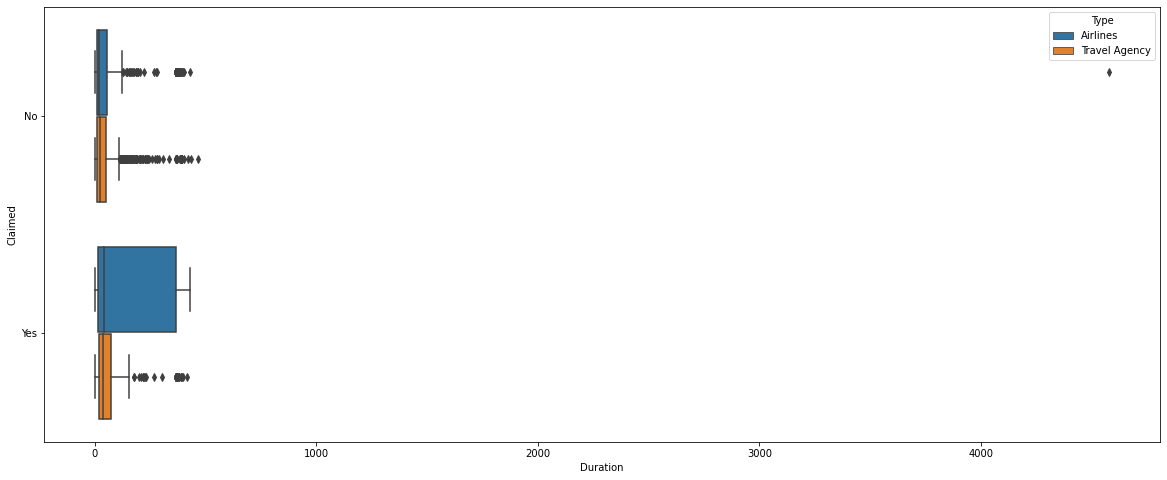

In [91]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(y='Claimed', x='Duration', hue='Type',data=df2)

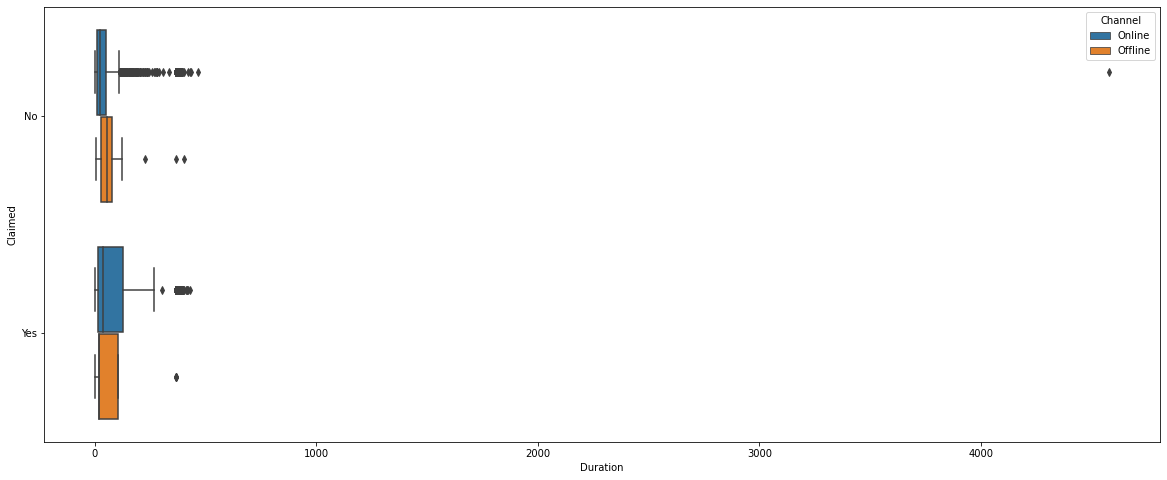

In [92]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(y='Claimed', x='Duration', hue='Channel',data=df2)

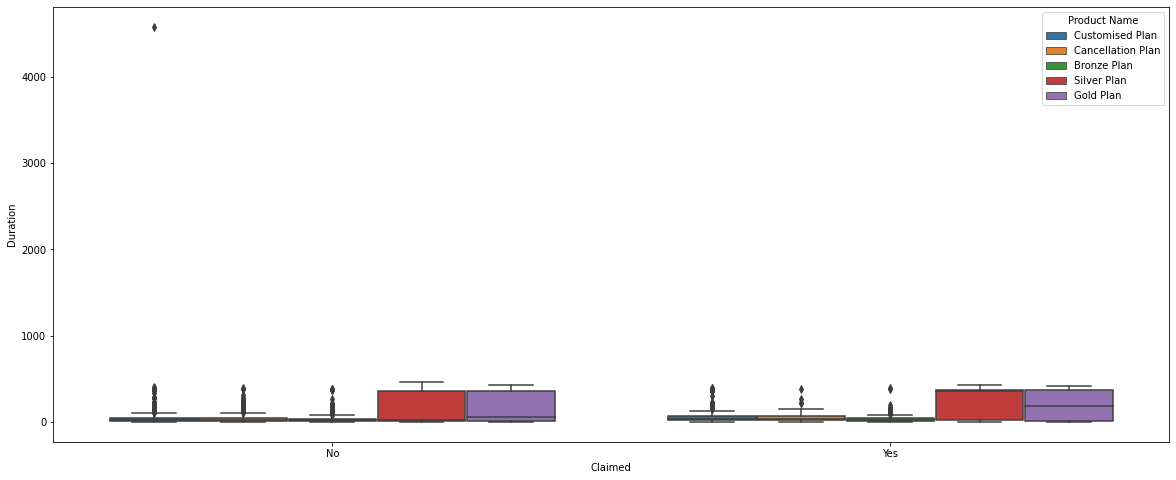

In [93]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(x='Claimed', y='Duration', hue='Product Name',data=df2)

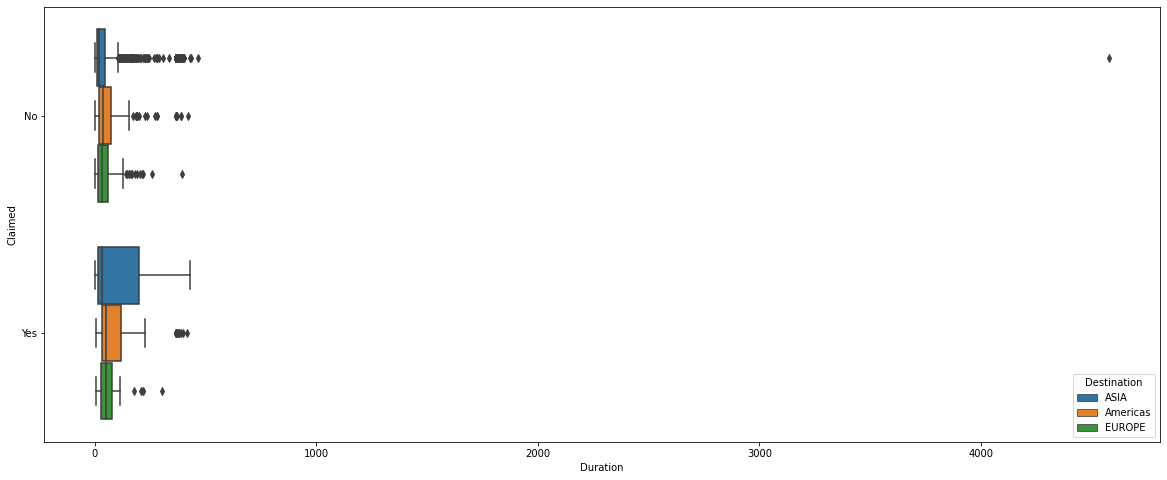

In [94]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(y='Claimed', x='Duration', hue='Destination',data=df2)

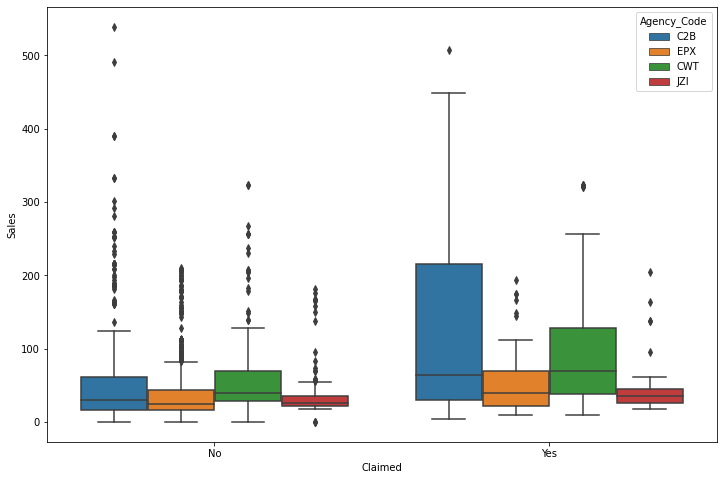

In [95]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Sales', hue='Agency_Code',data=df2)

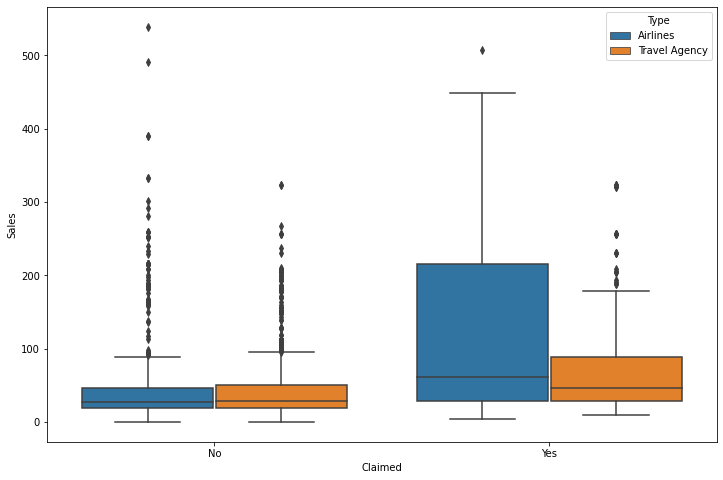

In [96]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Sales', hue='Type',data=df2)

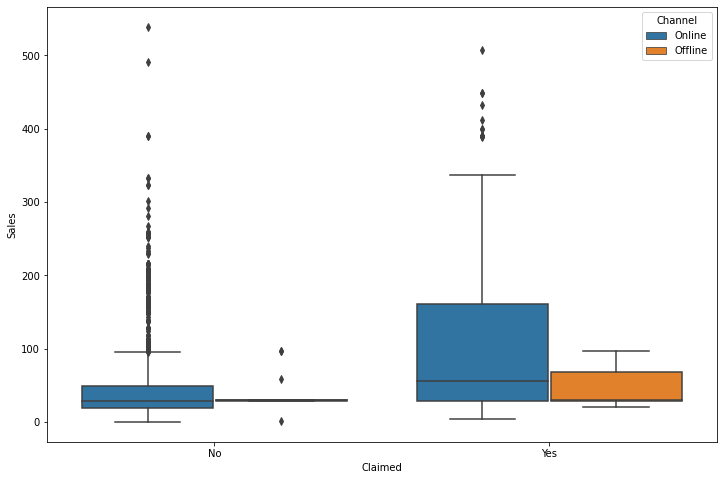

In [97]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Sales', hue='Channel',data=df2)

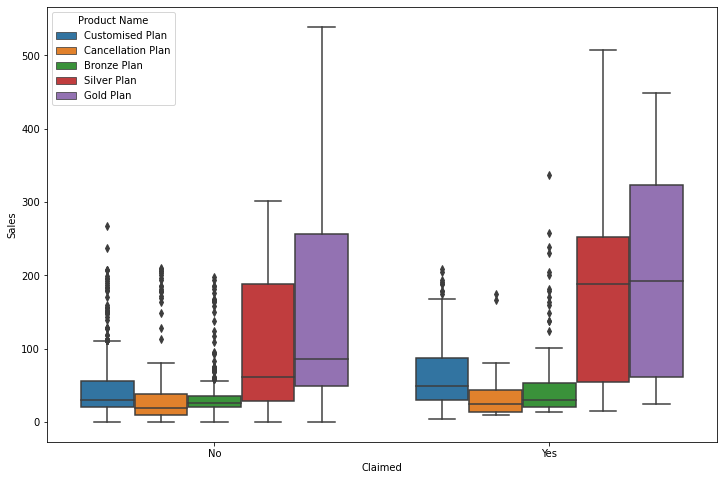

In [98]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Sales', hue='Product Name',data=df2)

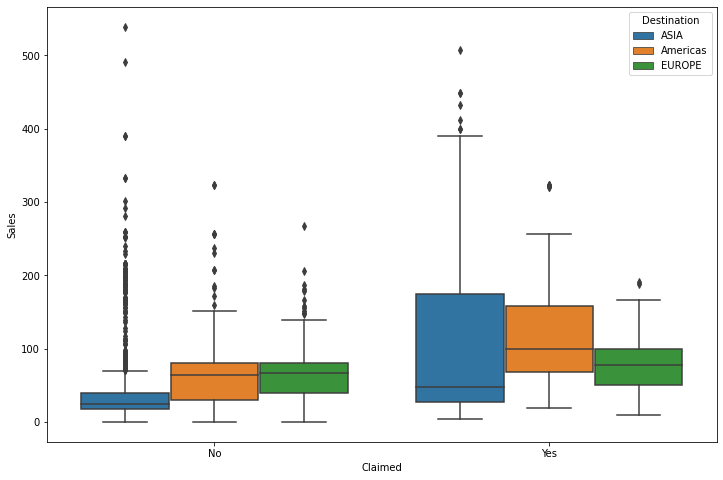

In [99]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Sales', hue='Destination',data=df2)

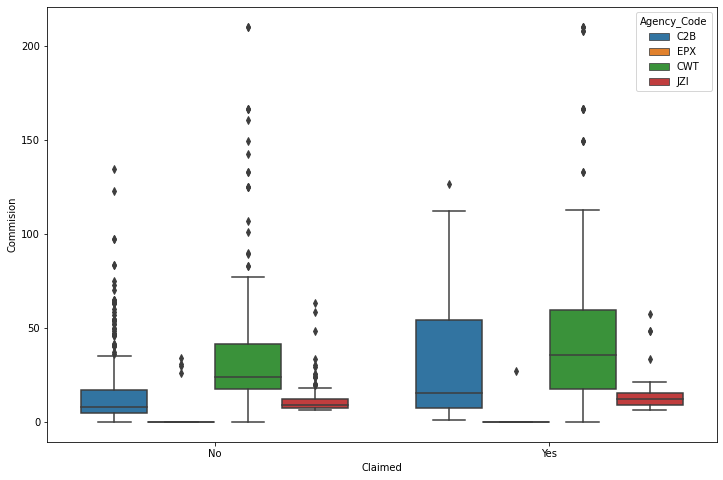

In [100]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Commision', hue='Agency_Code',data=df2)

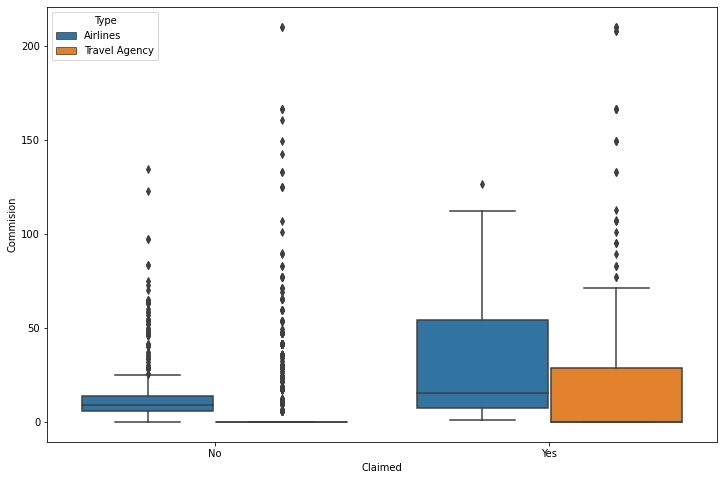

In [101]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Commision', hue='Type',data=df2)

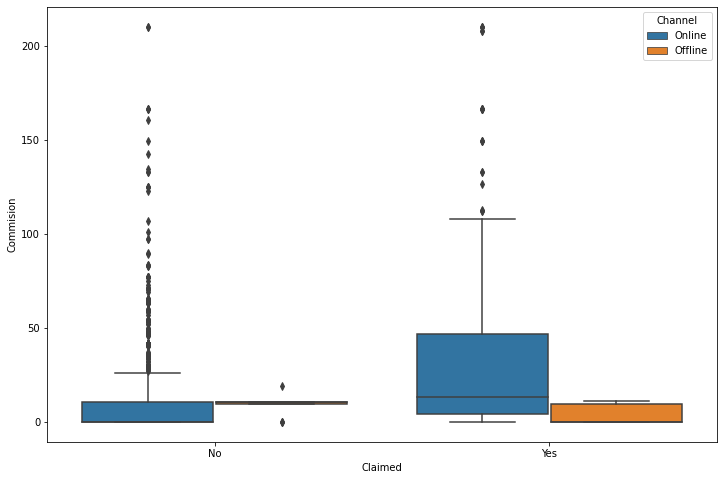

In [102]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Commision', hue='Channel',data=df2)

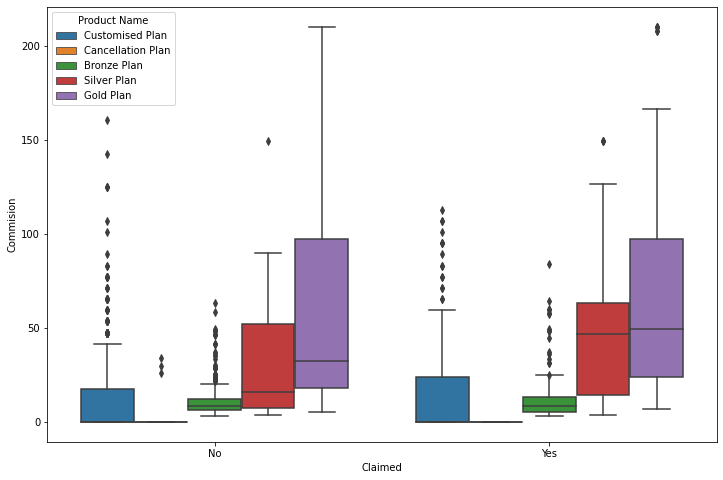

In [103]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Commision', hue='Product Name',data=df2)

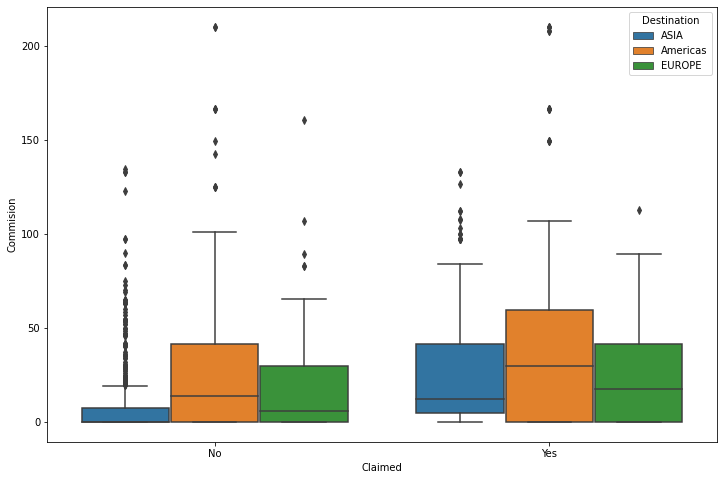

In [104]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Commision', hue='Destination',data=df2)

In [105]:
#2

In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [107]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan',
                         'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [108]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [110]:
print('Agency \n',df2.Agency_Code.value_counts())
print('\n')
print('Tour Type \n',df2.Type.value_counts())
print('\n')
print('Channel \n',df2.Channel.value_counts())
print('\n')
print('Product \n',df2['Product Name'].value_counts())
print('\n')
print('Destination \n',df2.Destination.value_counts())
print('\n')
print('Claimed Status \n',df2.Claimed.value_counts())

Agency 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Tour Type 
 1    1837
0    1163
Name: Type, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Product 
 2    1136
1     678
0     650
4     427
3     109
Name: Product Name, dtype: int64


Destination 
 0    2465
1     320
2     215
Name: Destination, dtype: int64


Claimed Status 
 0    2076
1     924
Name: Claimed, dtype: int64


In [111]:
df2.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [112]:
X = df2.drop("Claimed", axis=1)

y = df2.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

In [114]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total observations is', X_train.shape[0]+X_test.shape[0])

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total observations is 3000


In [115]:
X_test.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
311,36,2,1,0.00,1,39,26.0,1,0
1025,28,0,0,28.13,1,34,112.5,4,0
1587,39,3,0,7.70,1,11,22.0,0,0
2941,22,0,0,5.88,1,12,23.5,0,0
2980,55,1,1,23.76,1,8,39.6,2,1


In [116]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [117]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [118]:
from sklearn import tree

train_char_label = ['No', 'Yes']
HR_Tree_File = open('hr_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=HR_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

HR_Tree_File.close()

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [178]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100)], 'max_iter': [500],
                         'solver': ['sgd', 'adam'], 'tol': [0.01, 0.001]})

In [179]:
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 500,
 'solver': 'adam',
 'tol': 0.001}

In [121]:
best_grid = grid_search.best_estimator_

In [122]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [123]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1464
           1       0.68      0.57      0.62       636

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [125]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       612
           1       0.71      0.53      0.61       288

    accuracy                           0.78       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


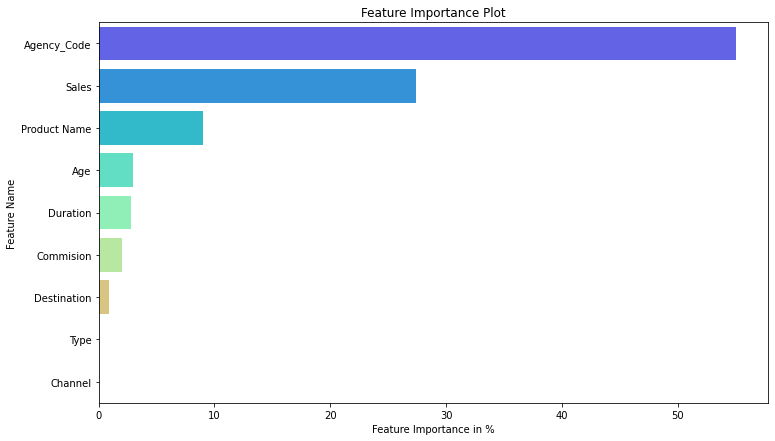

In [126]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [127]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.550452
Sales         0.274005
Product Name  0.089727
Age           0.029377
Duration      0.027699
Commision     0.019989
Destination   0.008751
Type          0.000000
Channel       0.000000


In [128]:
from sklearn.metrics import confusion_matrix

In [129]:
confusion_matrix(train_labels, ytrain_predict)

array([[1291,  173],
       [ 272,  364]])

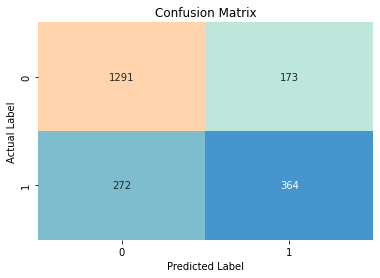

In [130]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d',cmap='icefire', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [131]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(train_labels, ytrain_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1291
False Positives:  173
False Negatives:  272
True Positives:  364


In [132]:
#Train Data Accuracy
best_grid.score(X_train,train_labels) 

0.7880952380952381

AUC: 0.837


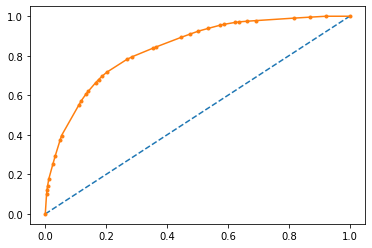

In [133]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [134]:
confusion_matrix(test_labels, ytest_predict)

array([[548,  64],
       [134, 154]])

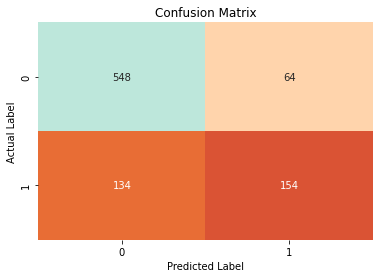

In [135]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True, cmap='icefire_r', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


In [136]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(test_labels, ytest_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  548
False Positives:  64
False Negatives:  134
True Positives:  154


In [137]:
#Test Data Accuracy
best_grid.score(X_test,test_labels) 

0.78

AUC: 0.817


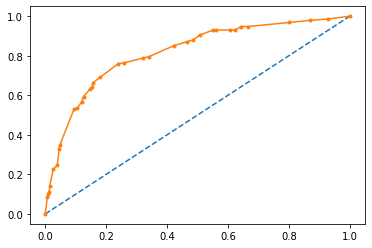

In [138]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [139]:
#random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [7, 8],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [140]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [20, 25],
                         'min_samples_split': [60, 75],
                         'n_estimators': [101, 301]})

In [141]:
grid_search.best_params_

{'max_depth': 8,
 'min_samples_leaf': 25,
 'min_samples_split': 75,
 'n_estimators': 301}

In [142]:
best_grid = grid_search.best_estimator_

In [143]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [144]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1464
           1       0.71      0.54      0.61       636

    accuracy                           0.79      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.79      0.79      0.78      2100



In [145]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       612
           1       0.76      0.53      0.62       288

    accuracy                           0.79       900
   macro avg       0.78      0.72      0.74       900
weighted avg       0.79      0.79      0.78       900



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


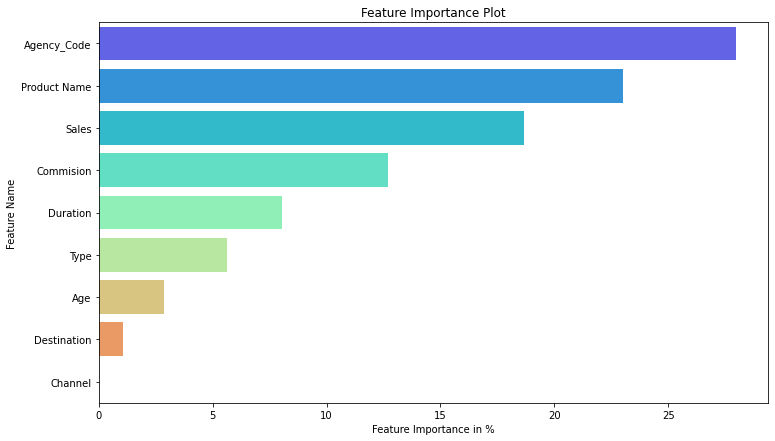

In [146]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [147]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.279781
Product Name  0.230239
Sales         0.186664
Commision     0.127123
Duration      0.080287
Type          0.056357
Age           0.028688
Destination   0.010862
Channel       0.000000


In [148]:
confusion_matrix(train_labels, ytrain_predict)

array([[1323,  141],
       [ 292,  344]])

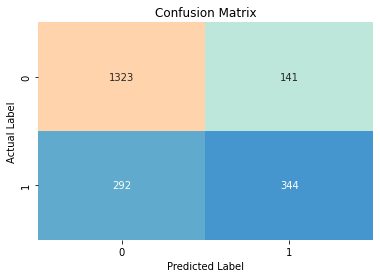

In [149]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d', cmap='icefire', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [150]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(train_labels, ytrain_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1323
False Positives:  141
False Negatives:  292
True Positives:  344


In [151]:
best_grid.score(X_train,train_labels) 

0.7938095238095239

AUC: 0.836


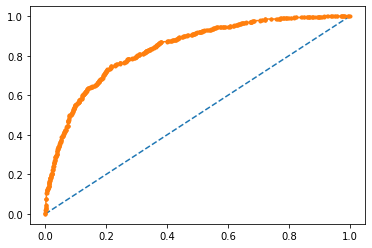

In [152]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [153]:
confusion_matrix(test_labels, ytest_predict)

array([[563,  49],
       [136, 152]])

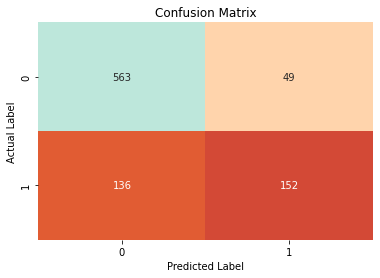

In [154]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True, fmt='d',cmap='icefire_r', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [155]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(test_labels, ytest_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  563
False Positives:  49
False Negatives:  136
True Positives:  152


In [156]:
#Test Data Accuracy
best_grid.score(X_test,test_labels) 

0.7944444444444444

AUC: 0.842


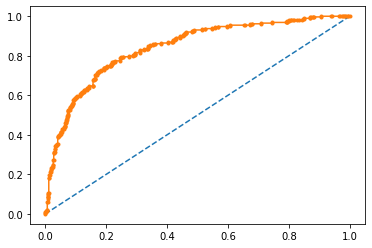

In [157]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [158]:
#ann

In [159]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [160]:
param_grid = {
    'hidden_layer_sizes': [(100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01,0.001],
    'max_iter' : [500]
}

mlp = MLPClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 3)

In [161]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100)], 'max_iter': [500],
                         'solver': ['sgd', 'adam'], 'tol': [0.01, 0.001]})

In [162]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 500,
 'solver': 'sgd',
 'tol': 0.001}

In [163]:
best_grid = grid_search.best_estimator_

In [164]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

In [165]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1464
           1       0.70      0.40      0.51       636

    accuracy                           0.77      2100
   macro avg       0.74      0.66      0.68      2100
weighted avg       0.76      0.77      0.75      2100



In [166]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       612
           1       0.75      0.35      0.48       288

    accuracy                           0.76       900
   macro avg       0.75      0.65      0.66       900
weighted avg       0.75      0.76      0.73       900



In [167]:
confusion_matrix(train_labels, ytrain_predict)

array([[1357,  107],
       [ 381,  255]])

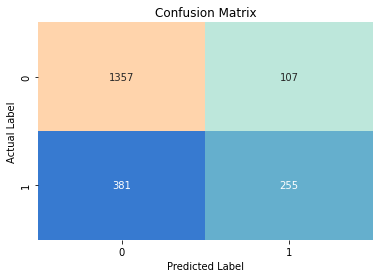

In [168]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d', cmap='icefire', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [169]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(train_labels, ytrain_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1357
False Positives:  107
False Negatives:  381
True Positives:  255


In [170]:
#Train Data Accuracy
best_grid.score(X_trains,train_labels) 

0.7676190476190476

AUC: 0.790


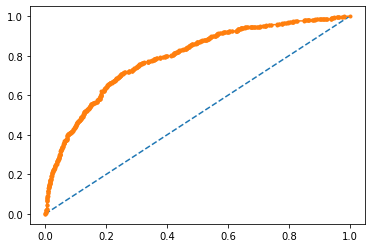

In [171]:
# predict probabilities
probs = best_grid.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [172]:
confusion_matrix(test_labels, ytest_predict)

array([[578,  34],
       [186, 102]])

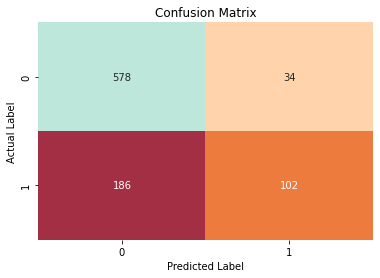

In [173]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True, fmt='d', cmap='icefire_r', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [174]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(test_labels, ytest_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  578
False Positives:  34
False Negatives:  186
True Positives:  102


In [175]:
#Test Data Accuracy
best_grid.score(X_tests,test_labels) 

0.7555555555555555

AUC: 0.799


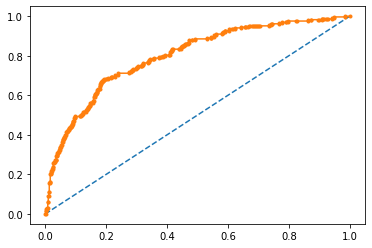

In [176]:
# predict probabilities
probs = best_grid.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()